# Lab Assignment One: Exploring Table Data

By: 

## 1. Business Understanding

 In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
- Be specific and use your own words to describe the aspects of the data.

For this assignment, we have chosen to look at the adult census dataset from UCI. The raw data was collected during the 1994 US Census and later formatted by Barry Becker in 1996. The dataset includes 14 attributes and looks to predict if an individual makes over $50,000 in income a year. Adjusted for [inflation](https://www.in2013dollars.com/us/inflation/1994?amount=50000), this equals a 2021 income of $92,106. That level of income would put an individual in the 82nd percentile of US [incomes](https://dqydj.com/income_percentile_calculator/).
 
This information is critical for policymakers and the general public to identify features that may equate to a better chance of earning a higher income. If any factor has a large impact on earnings, it is critical the public understand it as soon as possible in their life. It is equally important that governments at all levels understand what different factors play into the success of citizens, so they can attempt to bolster that behavior. The inverse is also important, as it informs possible biases that exist in society that may discriminate against certain members of society. 


## 2. Data Understanding

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Dqta is given without column names
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'above_50K_income'
]

df = pd.read_csv('adultdata.csv', names=columns, index_col=False, sep=', ', engine='python')

# Convert str 50K income to boolean
df['above_50K_income'] = df['above_50K_income'] == '>50K'

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num     32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital_gain      32561 non-null  int64 
 11  capital_loss      32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  above_50K_income  32561 non-null  bool  
dtypes: bool(1), int64(6), object(8)
memory usage: 3.5+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,above_50K_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


### 2.1 Data Description

Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

### 2.2 Data Quality

Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  

## 3. Data Visualization

### 3.1 Visualize Basic Feature Distributions

Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical and at least one numeric. 

<AxesSubplot:>

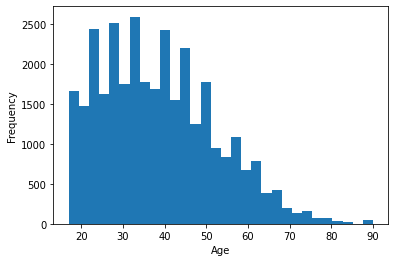

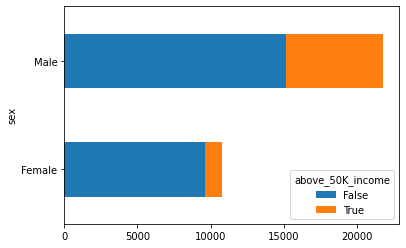

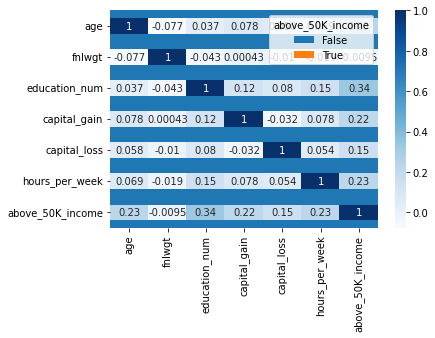

In [7]:
df.age.plot(kind='hist', bins=30)
plt.xlabel('Age')

pd.crosstab(df['sex'], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)
pd.crosstab(df['occupation'], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)

corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### 3.2 Interpret Questions with Visualizations

<AxesSubplot:ylabel='race,sex'>

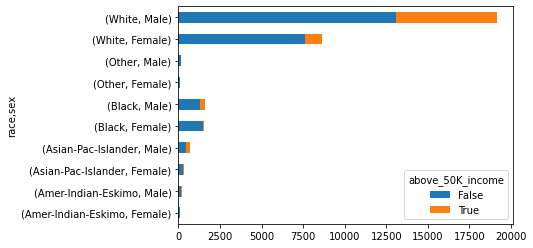

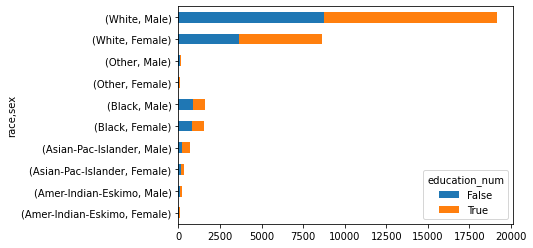

In [8]:
pd.crosstab([df['race'], df['sex']], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)
pd.crosstab([df['race'], df['sex']], (df['education_num'] > 9).astype(bool)).plot(kind='barh', stacked=True)

Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization. 

## 4. Exceptional Work

- You have free reign to provide any additional analyses. 
- One idea (required for 7000 level students): implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. Give an explanation of UMAP dimensionality reduction methods. You may be interested in the following information:
    * https://github.com/lmcinnes/umap (Links to an external site.) 
    * https://pair-code.github.io/understanding-umap/